# Problem Statement

$${{\text{{Perform Descriptive Statistical Analysis on a Dataset}}}}$$

1. Measures of Central Tendency
2. Measures of Dispersion
3. Probability Distributions:
   - Normal Distribution,
   - Uniform Distribution
4. Correlation and Covariance
5. Regression Analysis

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Loading Data

In [2]:
data = pd.DataFrame(pd.read_csv("Human Body Measurements.csv"))

In [3]:
data.shape

(716, 13)

The dataset consist of 13 variables and 715 Observations

In [4]:
data.columns

Index(['Gender', 'Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth ',
       'Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ',
       'WaistToKnee ', 'LegLength', 'TotalHeight'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


In [6]:
data.head(10)

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47
5,2.0,22,17,19,18,14,16,18,20,24,21,19,60
6,2.0,18,25,17,16,17,12,28,23,25,14,18,49
7,2.0,26,18,15,19,17,23,27,19,19,19,19,58
8,1.0,23,16,16,20,18,22,18,15,26,20,19,40
9,1.0,31,15,20,28,18,91,17,16,21,21,19,55


In [7]:
data.describe()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
count,715.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,1.453147,15.340782,20.574022,14.317039,14.569832,20.199721,19.265363,19.378492,18.817039,17.900838,16.560056,26.833799,48.118715
std,0.498148,11.831501,3.743353,4.762181,5.314646,10.132993,8.770706,8.745223,5.376592,5.379313,5.204411,7.925988,12.156722
min,1.000000,1.000000,5.000000,4.000000,6.000000,5.000000,2.000000,7.000000,6.000000,1.000000,4.000000,9.000000,19.000000
25%,1.000000,7.000000,19.000000,11.000000,11.000000,15.000000,12.000000,12.000000,16.000000,13.000000,13.000000,21.000000,40.000000
50%,1.000000,11.000000,20.000000,14.000000,13.000000,20.000000,20.000000,18.000000,19.000000,17.500000,16.000000,26.000000,48.000000
75%,2.000000,21.000000,22.000000,18.000000,17.000000,23.000000,23.000000,24.000000,22.000000,22.000000,20.000000,32.000000,55.000000
max,2.000000,68.000000,80.000000,87.000000,38.000000,213.000000,91.000000,63.000000,66.000000,39.000000,45.000000,50.000000,89.000000


# Checking for Null Values

In [8]:
data[data.isnull()].count()

Gender               0
Age                  0
HeadCircumference    0
ShoulderWidth        0
ChestWidth           0
Belly                0
Waist                0
Hips                 0
ArmLength            0
ShoulderToWaist      0
WaistToKnee          0
LegLength            0
TotalHeight          0
dtype: int64

There is no null values in the dataset

# Checking for Duplicated Records

In [4]:
data.duplicated().sum()

17

Let us try to drop them

In [5]:
data = data.drop_duplicates()
data.shape

(699, 13)

# Converting Gender attribute to 0's & 1's 

0 indicates Female while 1 indicates Male.

In [6]:
data["Gender"][data["Gender"] == 1] = 1
data["Gender"][data["Gender"] == 2] = 0

data['Gender'] = pd.to_numeric(data['Gender'], errors='coerce').fillna(0).astype(np.int64) # To avoid IntCastingNaNError with this code: data["Gender"].astype(int)
print(data.dtypes)
data

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6156\230523164.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["Gender"][data["Gender"] == 1] = 1
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6156\230523164.py:2: FutureWarning: ChainedAss

Gender               int64
Age                  int64
HeadCircumference    int64
ShoulderWidth        int64
ChestWidth           int64
Belly                int64
Waist                int64
Hips                 int64
ArmLength            int64
ShoulderToWaist      int64
WaistToKnee          int64
LegLength            int64
TotalHeight          int64
dtype: object


,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1,30,22,18,20,18,14,22,22,25,25,22,52
1,1,28,19,22,17,18,21,25,28,23,25,20,56
2,0,27,21,18,16,14,10,15,21,18,14,18,53
3,1,29,20,20,18,11,19,14,24,21,20,21,45
4,0,28,16,14,18,13,11,30,25,22,32,13,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,0,13,22,6,14,25,18,30,21,20,16,33,59
712,1,10,21,11,12,22,2,26,21,15,14,25,45
713,1,4,20,17,11,22,22,22,17,12,12,22,40
714,1,13,20,15,14,25,18,30,21,20,16,33,59


# Descriptive Statistics

## 1. Measures of Central Tendency - Summary Measure of Overall level of Dataset (Refer PPT)

- Mean
- Median (skewed)
- Mode (skewed)

#### Mean - Arithmetic mid value of any distribution

used for comparison, describing, prediction

In [12]:
data.iloc[:,1:].mean()

Age                  15.330472
HeadCircumference    20.575107
ShoulderWidth        14.336195
ChestWidth           14.623748
Belly                20.071531
Waist                19.114449
Hips                 19.244635
ArmLength            18.842632
ShoulderToWaist      17.947067
WaistToKnee          16.605150
LegLength            26.856938
TotalHeight          48.150215
dtype: float64

In [13]:
data.groupby('Gender').mean()

,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,,,,,,,,,,,,
0,13.116352,20.616352,13.864780,14.276730,21.081761,19.220126,19.735849,18.305031,17.028302,15.845912,25.943396,47.198113
1,17.178478,20.540682,14.729659,14.913386,19.228346,19.026247,18.834646,19.291339,18.713911,17.238845,27.619423,48.944882


#### Median - Physical mid value of any distribution

In [14]:
data.iloc[:,1:].median()

Age                  11.0
HeadCircumference    20.0
ShoulderWidth        14.0
ChestWidth           13.0
Belly                20.0
Waist                19.0
Hips                 18.0
ArmLength            19.0
ShoulderToWaist      18.0
WaistToKnee          16.0
LegLength            26.0
TotalHeight          48.0
dtype: float64

In [15]:
data.groupby('Gender').median()

,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,,,,,,,,,,,,
0,10.0,20.0,13.0,13.0,21.0,20.0,18.0,18.0,16.0,15.0,25.0,47.0
1,13.0,20.0,15.0,13.0,20.0,19.0,17.0,19.0,19.0,18.0,26.0,48.0


#### Mode - Most frquent occurance meant for Categorical Variable

In [16]:
data.mode()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1,6,20,11,11,20,12,11,17,13,14,21,44


In [17]:
gender = ["Female", "Male"]
print("Most Frequent Gender: ", gender[data["Gender"].mode()[0]])

Most Frequent Gender:  Male


## Mean vs Median vs Mode for `TotalHeight`

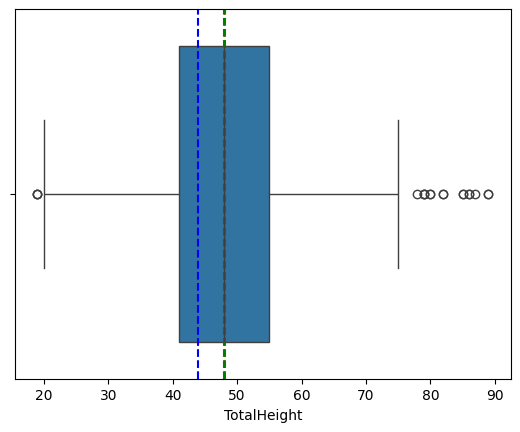

In [18]:
sns.boxplot(data=data, x="TotalHeight")
plt.axvline(data["TotalHeight"].mean(), color='r', linestyle='--')
plt.axvline(data["TotalHeight"].median(), color='g', linestyle='--')
plt.axvline(data["TotalHeight"].mode()[0], color='b', linestyle='--')

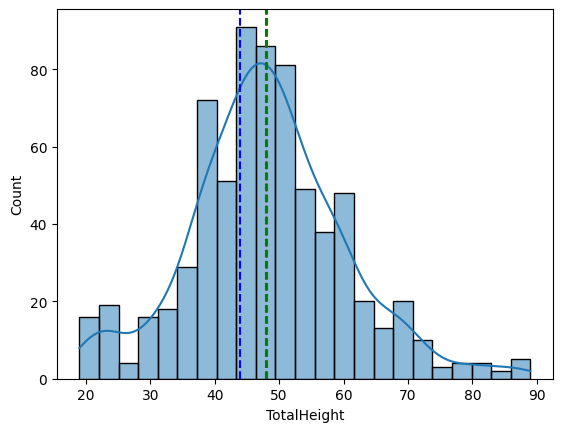

In [19]:
sns.histplot(data=data, x="TotalHeight", kde=True)
plt.axvline(data["TotalHeight"].mean(), color='r', linestyle='--')
plt.axvline(data["TotalHeight"].median(), color='g', linestyle='--')
plt.axvline(data["TotalHeight"].mode()[0], color='b', linestyle='--')

## When not to use Mean (or) Median (or) Mode


1. **Mean**: The mean is particularly susceptible to the influence of outliers². These are values that are unusual compared to the rest of the data set by being especially small or large in numerical value². When you have extreme values or a skewed distribution, the mean may not accurately represent the central tendency³. Also, the mean is only recommended as a good average to use if a distribution is normal or close to normally distributed¹.

2. **Median**: The median is less affected by outliers or skewed data compared to the mean¹. However, in datasets with multiple modes or bimodal distributions, the median may not represent a typical value¹.

3. **Mode**: The mode is the most frequently occurring value in a dataset¹. However, for continuous variables or ratio levels of measurement, the mode may not be a helpful measure of central tendency⁴. That’s because there are many more possible values than there are in a nominal or ordinal level of measurement. It’s unlikely for a value to repeat in a ratio level of measurement⁴. Also, a distribution can have multiple modes if many values occur with the same frequency¹.


## 2. Measures of Dispersion/Spread - To determine the quality of data in objectively quantifiable manner

- Standard Deviation
- Varience
- Range
- Percentile
- IQR
- Coefficient of Varience

#### Standard Deviation
- The standard deviation is the average amount of variability in dataset. i.e. On average, how far each score lies from the mean.
- The larger the standard deviation, the more variable the data set is.

In [20]:
data.std()

Gender                0.498322
Age                  11.643379
HeadCircumference     3.777631
ShoulderWidth         4.790450
ChestWidth            5.343508
Belly                10.155836
Waist                 8.715731
Hips                  8.657869
ArmLength             5.398276
ShoulderToWaist       5.366916
WaistToKnee           5.218578
LegLength             7.952374
TotalHeight          12.162535
dtype: float64

It seems the `TotalHeight`,`Age`and `Belly` are varying greatly from the mean.

In [21]:
data.groupby('Gender').std()

,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,,,,,,,,,,,,
0,9.744803,4.446384,5.541124,5.082179,12.518488,8.251296,9.270524,4.911652,5.168683,5.249440,7.302603,11.577815
1,12.738655,3.117278,4.024646,5.542216,7.560133,9.095073,8.100777,5.741048,5.415333,5.113775,8.390128,12.589871


Standard Deviation of `Belly` for `Female` seems to be vary greatly than `Male`.

#### Varience 
- The variance is the average of squared deviations from the mean. (Reflects the degree of spread)
- The more spread the data, the larger the variance is in relation to the mean.

- While squaring is the standard method, absolute values (|xi - x̄|) could be used instead. However, squaring offers mathematical advantages. It leads to a property called "additivity of variances," which simplifies calculations involving combined datasets.

In [22]:
data.var()

Gender                 0.248324
Age                  135.568282
HeadCircumference     14.270497
ShoulderWidth         22.948416
ChestWidth            28.553074
Belly                103.141008
Waist                 75.963960
Hips                  74.958693
ArmLength             29.141389
ShoulderToWaist       28.803784
WaistToKnee           27.233555
LegLength             63.240249
TotalHeight          147.927260
dtype: float64

In [23]:
data.groupby(["Gender"]).var()

,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,,,,,,,,,,,,
0,94.961183,19.770331,30.704055,25.828542,156.712537,68.083884,85.942622,24.124328,26.715285,27.556624,53.328016,134.045801
1,162.273325,9.717420,16.197776,30.716162,57.155615,82.720362,65.622586,32.959635,29.325832,26.150698,70.394253,158.504849


### Difference Between Varience & Standard Deviation

1. **Variance**:
   - **Definition**: Variance measures the **average degree of deviation** of each data point from the mean.
   - **Calculation**: To find the variance, you calculate the **squared difference** between each data point and the mean, then average those squared differences.
   - **Units**: Variance is expressed in **squared units**, which can be less intuitive for interpretation.
   - **Spread Size**: A larger variance indicates **greater variability** in data values compared to the mean. If data values are widely dispersed, the variance will be larger¹².

2. **Standard Deviation**:
   - **Definition**: Standard deviation measures how far a group of numbers deviates from the mean. It quantifies the **spread** of data points.
   - **Calculation**: Standard deviation is the **square root of the variance**. It considers the variation between each data point relative to the mean.
   - **Interpretation**: If data points are further from the mean, the standard deviation is higher. Conversely, if they are closer to the mean, the deviation is lower.
   - **Usefulness**: Traders and investors rely on standard deviation to assess **market volatility** and make informed decisions¹.

Variance is needed to calculate standard deviation. While variance provides a direct measure of variability, standard deviation offers a more intuitive understanding of how data points deviate from the mean.

[Also Refer](https://www.mathsisfun.com/data/standard-deviation.html)

#### Range - The bigger the range the more spread out is the data.

In [24]:
range = pd.DataFrame({"Maximum": list(data.max()), "Minimum": list(data.min()), "Range": list(data.max() - data.min())})
range.set_index(data.columns)

,Maximum,Minimum,Range
Gender,1,0,1
Age,68,1,67
HeadCircumference,80,5,75
ShoulderWidth,87,4,83
ChestWidth,38,6,32
Belly,213,5,208
Waist,91,2,89
Hips,63,7,56
ArmLength,66,6,60
ShoulderToWaist,39,1,38


#### Percentile

- Percentile is a way to represent position of a values in data set.
- Percentiles are a way of comparing a value to a set of other values
- To calculate percentile, values in data set should always be in ascending order.

Example 1:
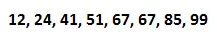

- The median 59 has 4 values less than itself out of 8.
- It can also be said as: In data set, 59 is 50th percentile because 50% of the total terms are less than 59.
- It is represented as 50th percentile, not 50%

Example 2:

- Imagine you have a class of 100 students and their scores on a test.
- If a student scored in the 80th percentile, it means 80% of the class scored lower than that student on the test.

- **The general rule is that if value X is at the kth percentile, then X is greater than K% of the values.**

In [25]:
q1 = data.quantile(0.25) #25th Percentile
q2 = data.quantile(0.50) #50th Percentile -- Median
q3 = data.quantile(0.75) #75th Percentile

print("25th Percentile",q1)
print()
print("Meadian 50th\n\n",q2)
print()
print("75th Percentile\n\n",q3)
        

25th Percentile Gender                0.0
Age                   7.0
HeadCircumference    19.0
ShoulderWidth        11.0
ChestWidth           11.0
Belly                15.0
Waist                12.0
Hips                 12.0
ArmLength            16.0
ShoulderToWaist      13.0
WaistToKnee          13.0
LegLength            21.0
TotalHeight          41.0
Name: 0.25, dtype: float64

Meadian 50th

 Gender                1.0
Age                  11.0
HeadCircumference    20.0
ShoulderWidth        14.0
ChestWidth           13.0
Belly                20.0
Waist                19.0
Hips                 18.0
ArmLength            19.0
ShoulderToWaist      18.0
WaistToKnee          16.0
LegLength            26.0
TotalHeight          48.0
Name: 0.5, dtype: float64

75th Percentile

 Gender                1.0
Age                  21.0
HeadCircumference    22.0
ShoulderWidth        18.0
ChestWidth           17.0
Belly                23.0
Waist                23.0
Hips                 24.0
ArmLength   

#### Inter Quartile Range (less influenced by extreme values/ Outliers)

- Quartiles are values that divide data into quarters provided data is sorted in an ascending order.

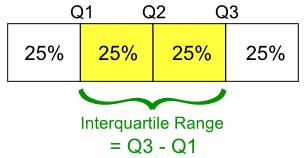

- There are three quartile values. First quartile value is at 25 percentile. First quartile (Q1) is median of upper half of the data.
- Second quartile is 50 percentile and the third quartile is 75 percentile. Second quartile (Q2) is median of the whole data.
- Third Quartile (Q3) is median of lower half of the data.

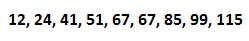

- Q2 = 67: is 50 percentile of the whole data and is median.

- Q1 = 41: is 25 percentile of the data.

- Q3 = 85: is 75 percentile of the date.

**Interquartile range (IQR)** = Q3 - Q1 = 85 - 41 = 44 [If you sort data in descending order, IQR will be -44]

data.quantile([0.1, 0.5, 0.9]) would return a Series containing the 10th, 50th (median), and 90th percentiles.

In [26]:
IQR = q3 - q1
IQR

Gender                1.0
Age                  14.0
HeadCircumference     3.0
ShoulderWidth         7.0
ChestWidth            6.0
Belly                 8.0
Waist                11.0
Hips                 12.0
ArmLength             6.0
ShoulderToWaist       9.0
WaistToKnee           7.0
LegLength            11.0
TotalHeight          14.0
dtype: float64

#### Coefficient of Varience

   - The **coefficient of variation** is a measure of **relative variability**. It quantifies the **relative spread** of data points around the **mean**.
   - Formula for CV: $$CV = \frac{{\text{{Standard Deviation}}}}{{\text{{Mean}}}}$$
   - It is expressed as a **percentage**.
   - A **higher CV** indicates greater **dispersion** around the mean.
   - Commonly used in fields like finance, economics, and quality control to compare variability across different datasets or populations.
   - For example, if the CV of a dataset is 20%, it means the standard deviation is 20% of the mean.

Are Covarience and Coefficient of Varience same?? NO.
- **Coefficient of Variation (CV)** focuses on **relative variability**.
- **Covariance** assesses the **association** between two variables.


In [27]:
coefficient_of_varience = data.std()/data.mean()
coefficient_of_varience[2:]

HeadCircumference    0.183602
ShoulderWidth        0.334151
ChestWidth           0.365399
Belly                0.505982
Waist                0.455976
Hips                 0.449885
ArmLength            0.286493
ShoulderToWaist      0.299041
WaistToKnee          0.314275
LegLength            0.296101
TotalHeight          0.252596
dtype: float64

## 3. Probability Distribution (Refer PPT)

- Probability --> Share of success/Total possible outcome
- All possible outcomes are known
- Equally likly outcomes

$${{\text{{Bayes Theorem}}}}$$
$$P(A|B) = \frac{{\text{{P(A) * P(B|A)}}}}{{\text{{P(B)}}}}$$

#### i. Normal Distribution/ Gaussian Distribution/ Bell curve

- Continuous probability distribution
- Probability density function

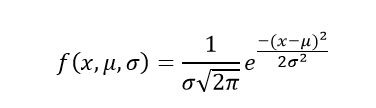


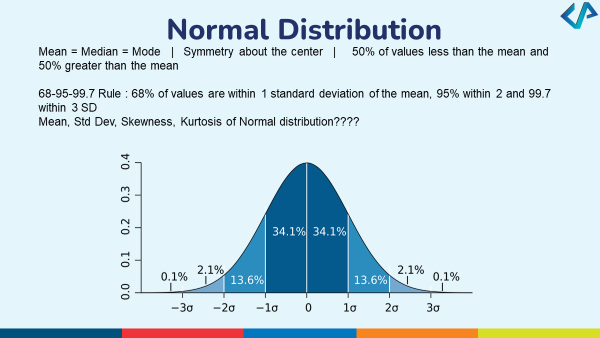

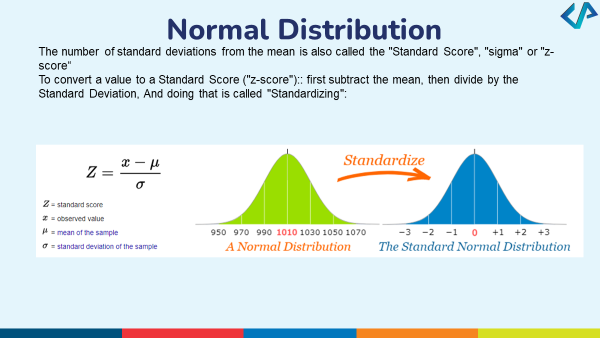


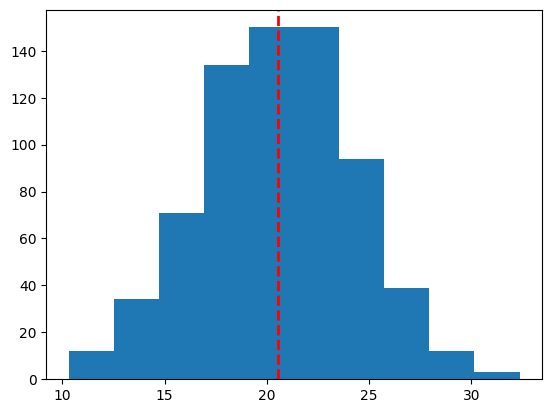

In [28]:
# Mean of the distribution 
Mean = data["HeadCircumference"].mean()

# satndard deviation of the distribution
Standard_deviation = data["HeadCircumference"].std()

# size
size = len(data["HeadCircumference"])

# creating a normal distribution data
values = np.random.normal(Mean, Standard_deviation, size)

# plotting histograph
plt.hist(values)
# plotting mean line
plt.axvline(values.mean(), color='r', linestyle='dashed', linewidth=2)
plt.show()


#### ii. Uniform Distribution

- A uniform distribution is a continuous random variable in which all values between a minimum value and a maximum value have the same probability.  

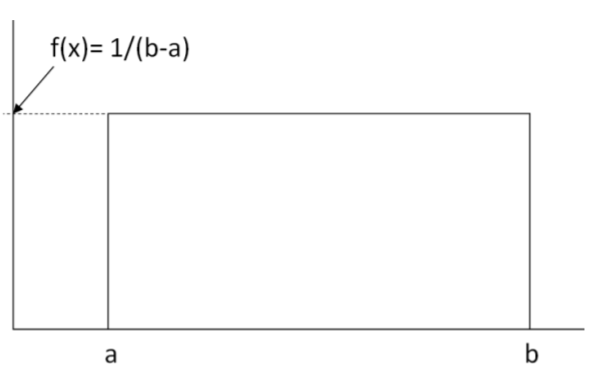

The two parameters that define the Uniform Distribution are:

a = minimum   &     b = maximum

The probability density function is the constant function, which creates a rectangular shape.    

$$f(x) = \frac{{\text{{1}}}}{{\text{{(b - a)}}}}$$

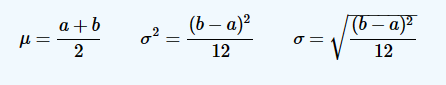

[Reference](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Inferential_Statistics_and_Probability_-_A_Holistic_Approach_(Geraghty)/07%3A_Continuous_Random_Variables/7.03%3A_Uniform_Distribution)

## Correlation and Covarience
#### Covariance:
   - **Covariance** measures the **degree of association** between two variables.
   - It indicates whether changes in one variable are **positively or negatively related** to changes in another variable. (Always measured for sample.)
   - Formula for Covariance: $$\text{{COV}}(X, Y) = \frac{{\sum (x_i - \bar{x})(y_i - \bar{y})}}{{n}}$$

     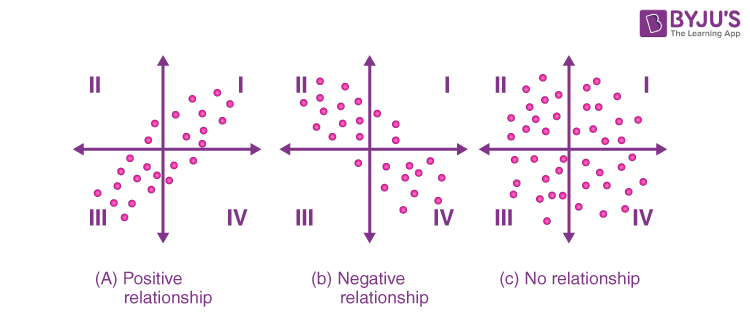
     
   - A **positive covariance** suggests that when one variable increases, the other tends to increase as well.
   - A **negative covariance** suggests an **inverse relationship** between the variables.
   - Covariance is used to understand how two variables move together.
   - However, it doesn't provide a standardized measure of association.
   - **Correlation measures both the strength and direction of the linear relationship between two variables.**

1. [Difference Between Covarience & Correlation](https://byjus.com/jee/difference-between-covariance-and-correlation/)
   
2. [Difference Between Varience, Covarience & Correlation](https://www.pythonfordatascience.org/variance-covariance-correlation/)

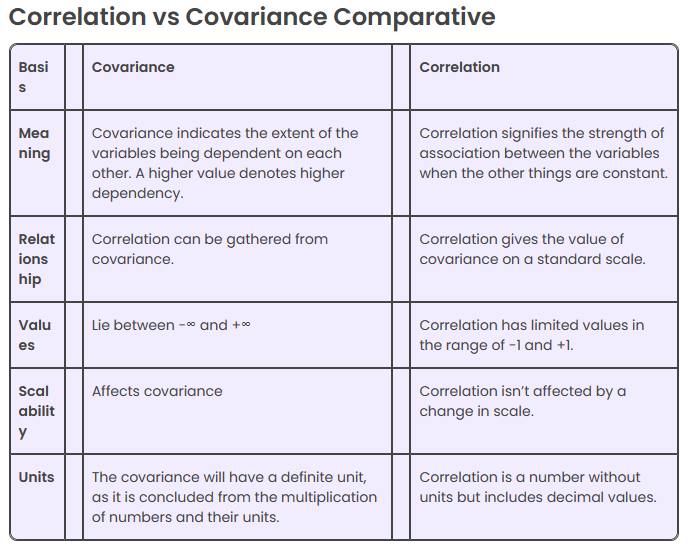

#### Correlation:
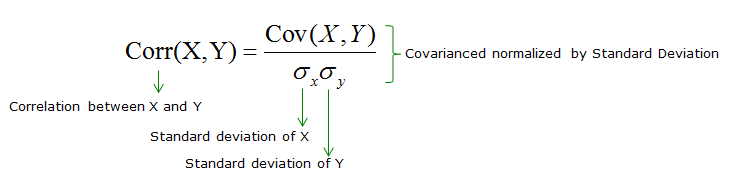
- **Correlation measures both the strength and direction of the linear relationship between two variables.**

In [29]:
data.cov()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,0.248324,1.008725,-0.018791,0.214771,0.158097,-0.460248,-0.048145,-0.223791,0.244924,0.418578,0.345899,0.416198,0.433765
Age,1.008725,135.568282,7.253797,27.410228,18.094433,11.940511,40.896221,40.853136,26.933169,36.826973,32.944427,34.310956,70.168052
HeadCircumference,-0.018791,7.253797,14.270497,3.317836,6.202369,6.778287,6.201993,8.791772,6.978885,6.488938,6.950902,10.914772,18.065349
ShoulderWidth,0.214771,27.410228,3.317836,22.948416,9.446159,3.176490,10.745135,12.096720,8.359572,12.918967,11.683080,12.314641,25.018194
ChestWidth,0.158097,18.094433,6.202369,9.446159,28.553074,9.019789,14.396992,18.663810,8.314631,13.547391,14.371282,14.751253,30.426227
Belly,-0.460248,11.940511,6.778287,3.176490,9.019789,103.141008,32.582060,37.748952,6.935342,3.591184,8.438026,19.391337,36.093824
Waist,-0.048145,40.896221,6.201993,10.745135,14.396992,32.582060,75.963960,51.993452,11.754426,17.927270,17.278779,20.116683,42.793672
Hips,-0.223791,40.853136,8.791772,12.096720,18.663810,37.748952,51.993452,74.958693,13.699011,19.359673,18.555185,22.552240,44.775520
ArmLength,0.244924,26.933169,6.978885,8.359572,8.314631,6.935342,11.754426,13.699011,29.141389,14.159280,14.305969,20.106394,33.956338
ShoulderToWaist,0.418578,36.826973,6.488938,12.918967,13.547391,3.591184,17.927270,19.359673,14.159280,28.803784,18.559299,21.869207,37.889051


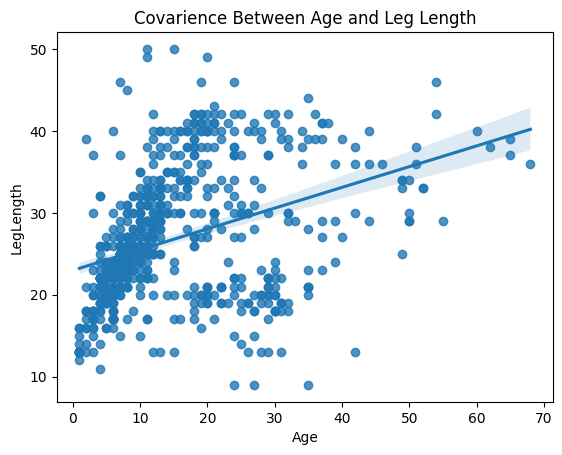

In [30]:
sns.regplot(x = "Age", y = "LegLength", data = data)
plt.xlabel("Age")
plt.ylabel("LegLength")
plt.title("Covarience Between Age and Leg Length")
plt.show()

In [31]:
data.corr()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
Gender,1.000000,0.173854,-0.009982,0.089968,0.059373,-0.090942,-0.011085,-0.051871,0.091047,0.156510,0.133011,0.105025,0.071568
Age,0.173854,1.000000,0.164918,0.491425,0.290830,0.100978,0.402996,0.405262,0.428502,0.589335,0.542189,0.370559,0.495492
HeadCircumference,-0.009982,0.164918,1.000000,0.183341,0.307264,0.176679,0.188368,0.268810,0.342225,0.320058,0.352590,0.363328,0.393190
ShoulderWidth,0.089968,0.491425,0.183341,1.000000,0.369022,0.065291,0.257354,0.291662,0.323260,0.502489,0.467336,0.323258,0.429394
ChestWidth,0.059373,0.290830,0.307264,0.369022,1.000000,0.166209,0.309130,0.403425,0.288245,0.472394,0.515367,0.347141,0.468164
Belly,-0.090942,0.100978,0.176679,0.065291,0.166209,1.000000,0.368094,0.429317,0.126502,0.065887,0.159211,0.240102,0.292209
Waist,-0.011085,0.402996,0.188368,0.257354,0.309130,0.368094,1.000000,0.689023,0.249829,0.383253,0.379889,0.290239,0.403693
Hips,-0.051871,0.405262,0.268810,0.291662,0.403425,0.429317,0.689023,1.000000,0.293105,0.416641,0.410679,0.327553,0.425212
ArmLength,0.091047,0.428502,0.342225,0.323260,0.288245,0.126502,0.249829,0.293105,1.000000,0.488721,0.507820,0.468363,0.517180
ShoulderToWaist,0.156510,0.589335,0.320058,0.502489,0.472394,0.065887,0.383253,0.416641,0.488721,1.000000,0.662651,0.512403,0.580450


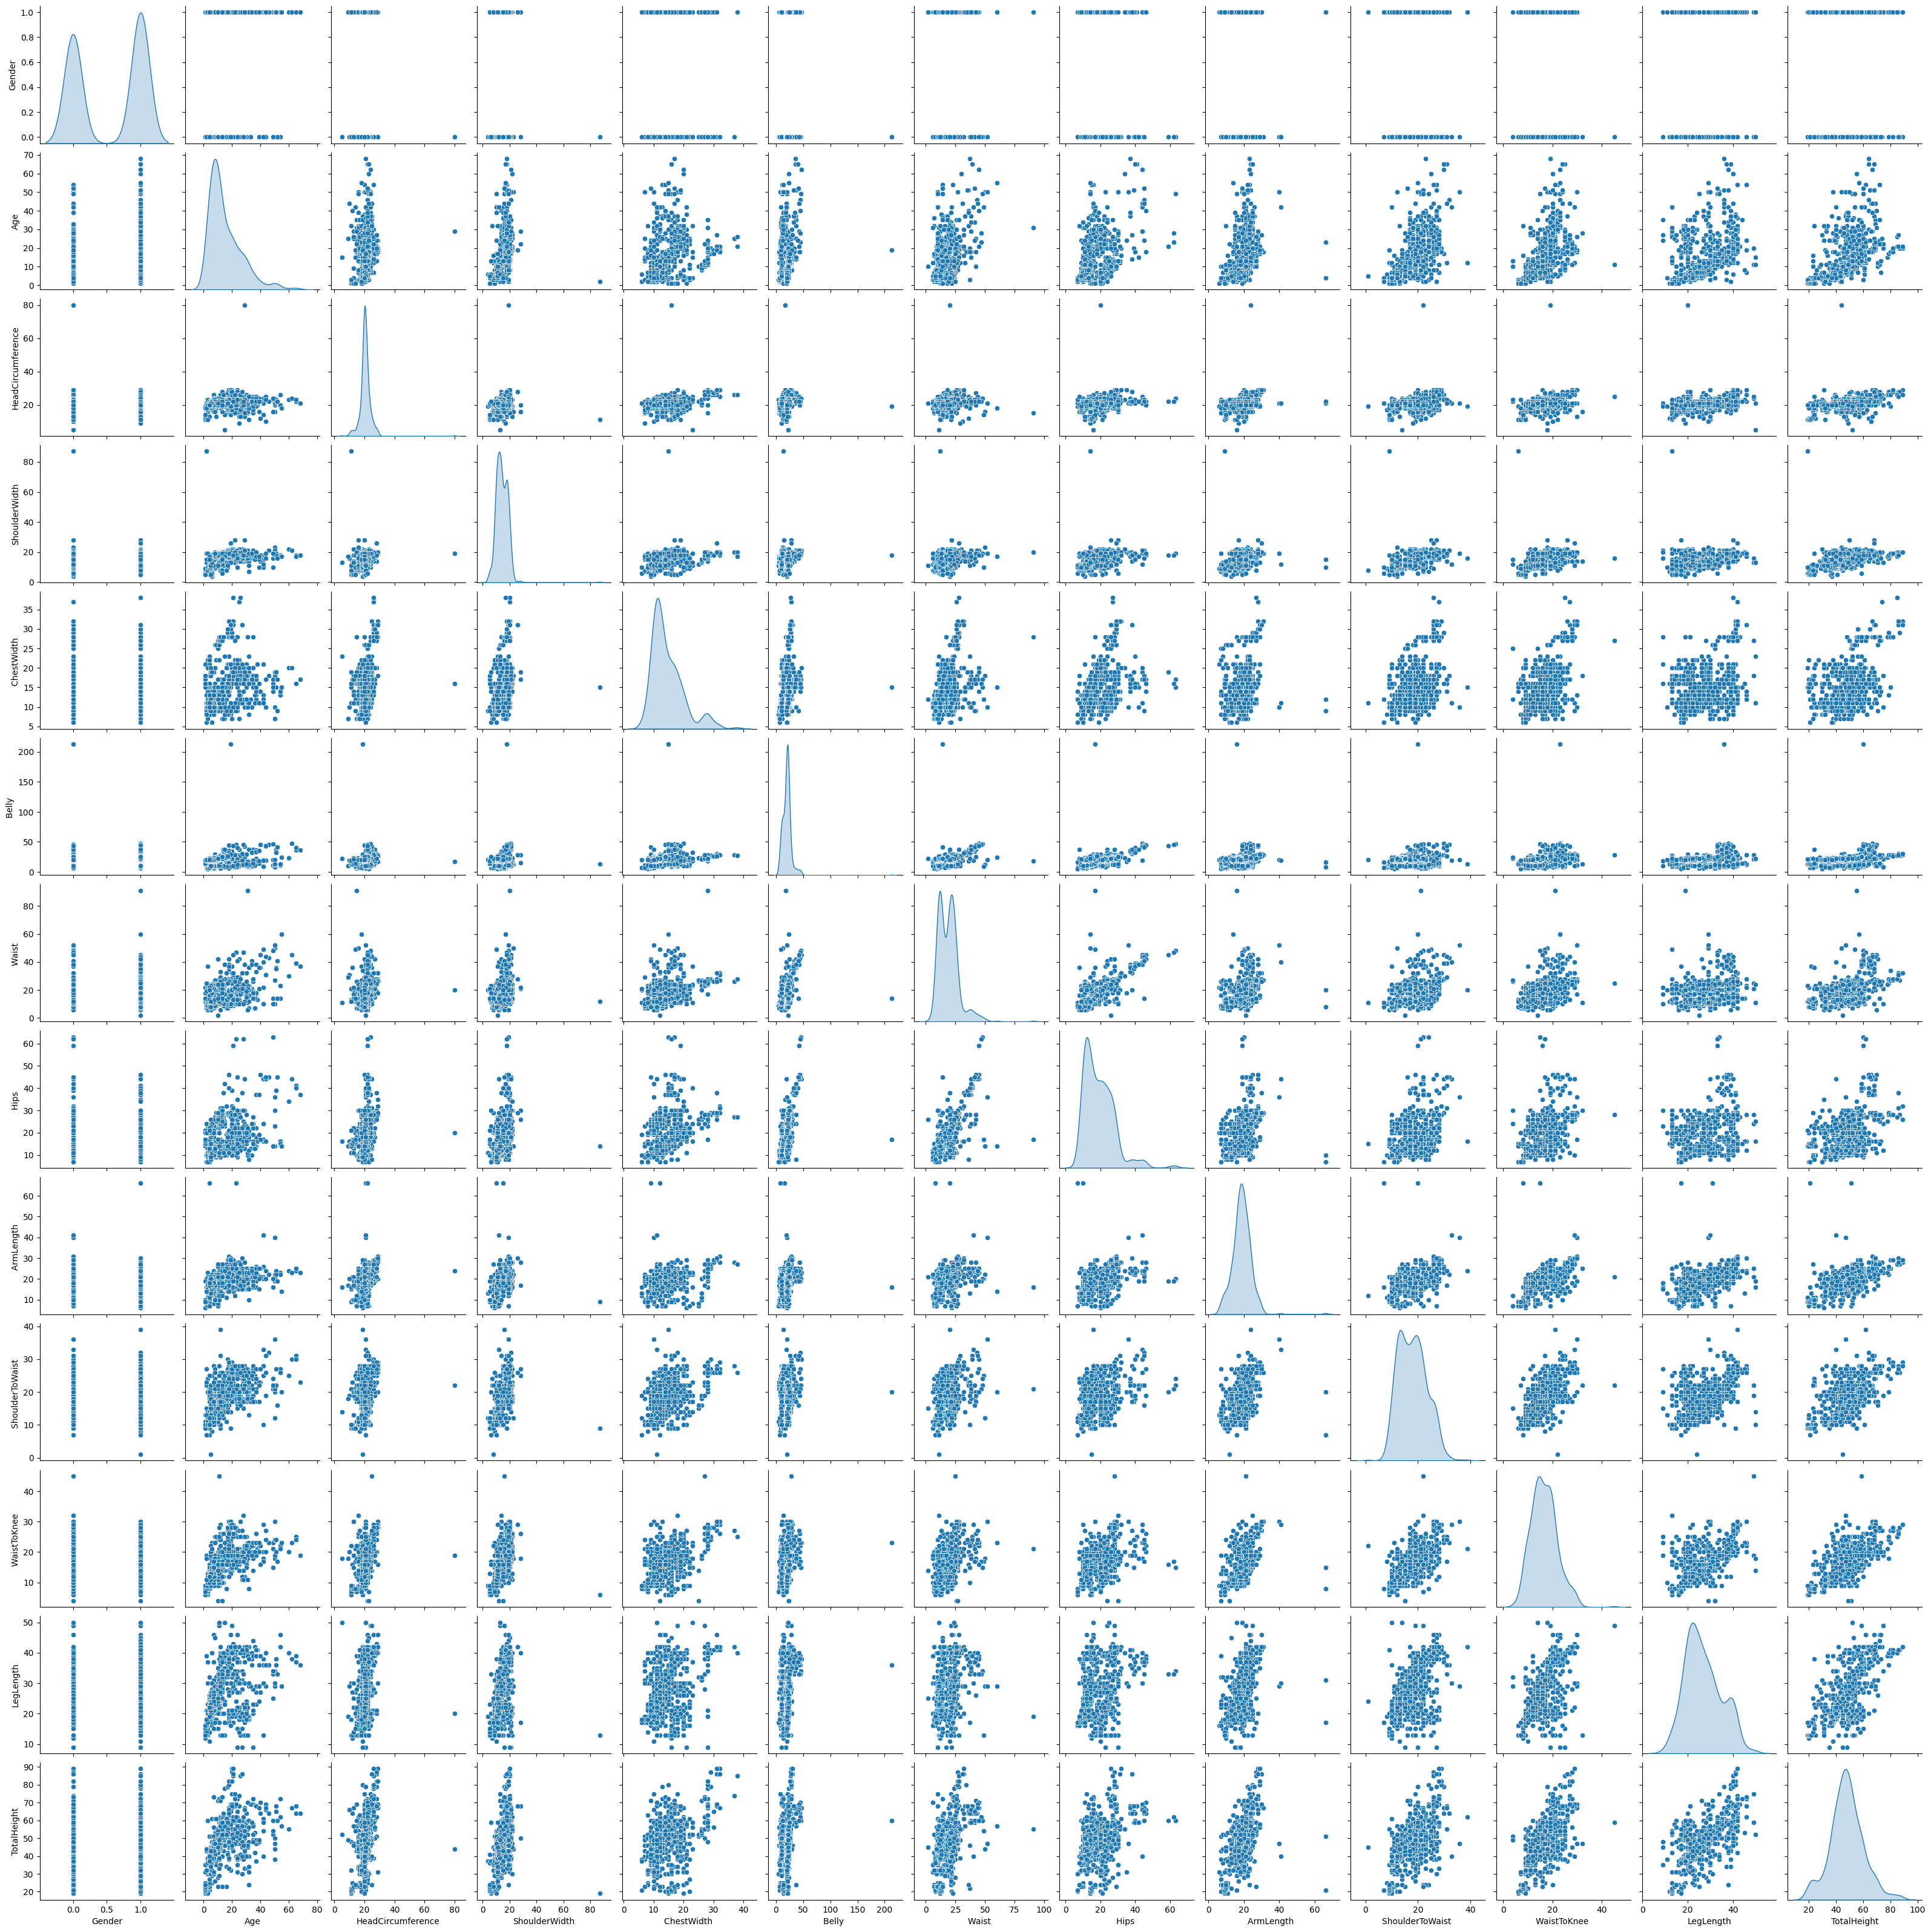

In [32]:
sns.pairplot(data = data, diag_kind = "kde")

<Axes: >

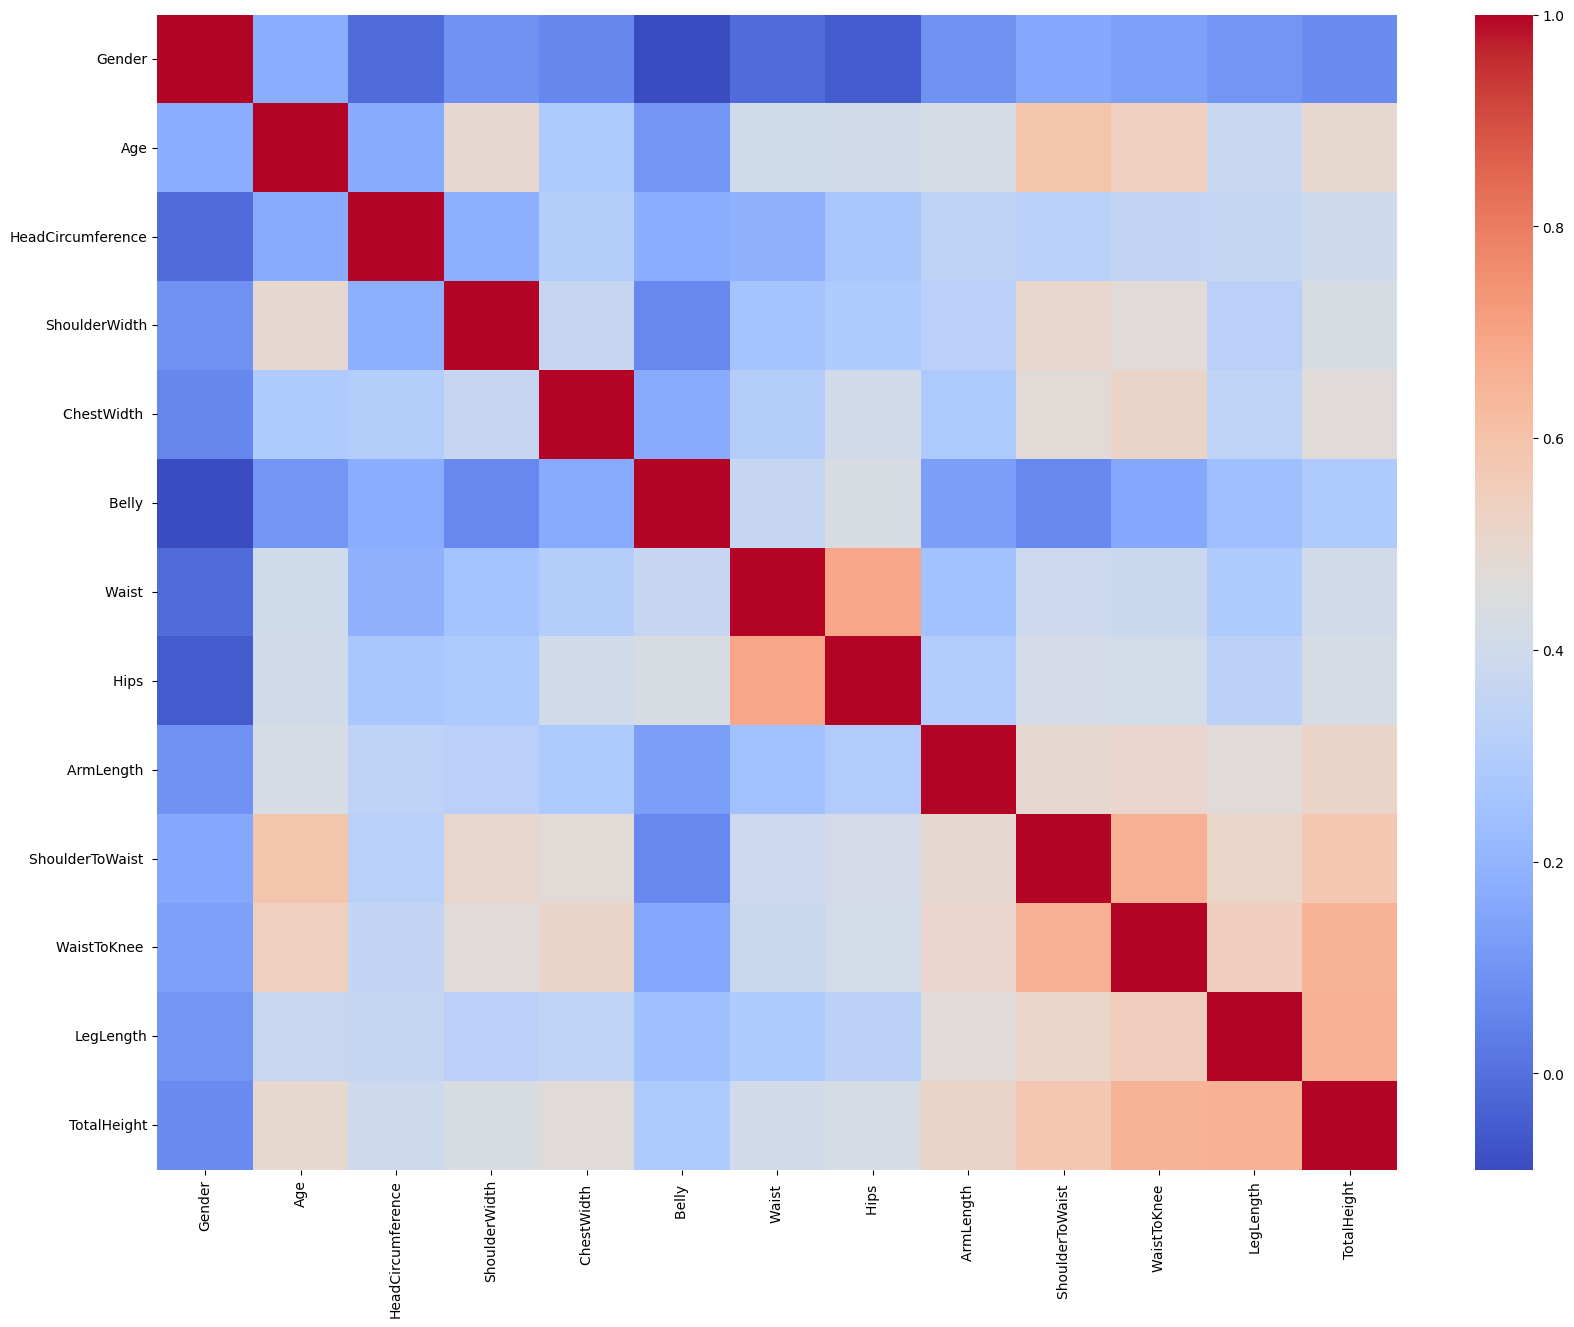

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(data = data.corr(), cmap='coolwarm')

## Variance:

- Measures how far a set of numbers are spread out
- To indicate how widely individuals in a group vary
- **It should be noted that variance is always non-negative**
- A variance of zero indicates that all the values are **identical**. 
- A small variance indicates that the data points tend to be very close to the mean
- High variance indicates that the data points are very spread out around the mean and from each other.

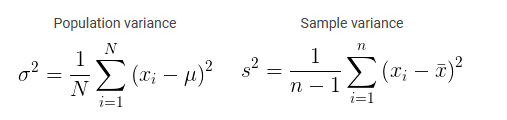




-----

**Alternative Approach:**
-  While squaring is the standard method, absolute values (|xi - x̄|) could be used instead. However, squaring offers mathematical advantages. It leads to a property called "additivity of variances," which simplifies calculations involving combined datasets

Refer photograpgh for more..



## 5. Regression Analysis

## [Must Read](https://www.g2.com/articles/regression-analysis)

1. Regression analysis is a statistical process that helps assess the relationships between a dependent variable and one or more independent variables.
2. Used To:
   - Estimate the value of one variable using the known values of other variables.
   - Predict results and shifts in a variable based on its relationship with other variables.
   - Control the influence of variables while exploring the relationship between variables. 

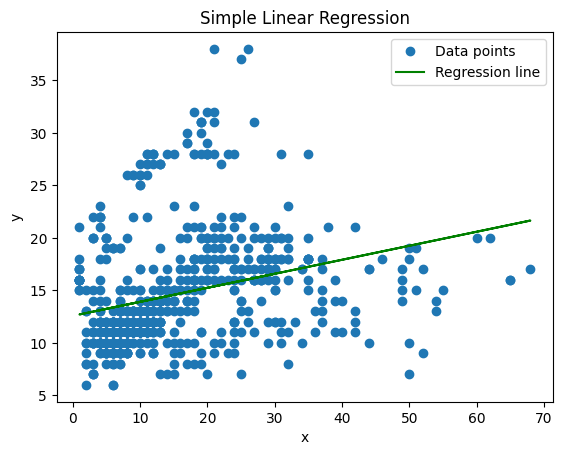

In [9]:
# Example data (replace with your actual data)
x = data["Age"]  # Independent variable
y = data["ChestWidth "]  # Dependent variable

# Fit the regression line
m, b = np.polyfit(x, y, 1)  # Obtain slope (m) and y-intercept (b)

# Create a scatterplot
plt.plot(x, y, 'o', label='Data points')

# Plot the regression line
plt.plot(x, m * x + b, color='green', label='Regression line')

# Add labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()

# Show the plot
plt.show()


In [7]:
data.columns

Index(['Gender', 'Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth ',
       'Belly ', 'Waist ', 'Hips ', 'ArmLength ', 'ShoulderToWaist ',
       'WaistToKnee ', 'LegLength', 'TotalHeight'],
      dtype='object')

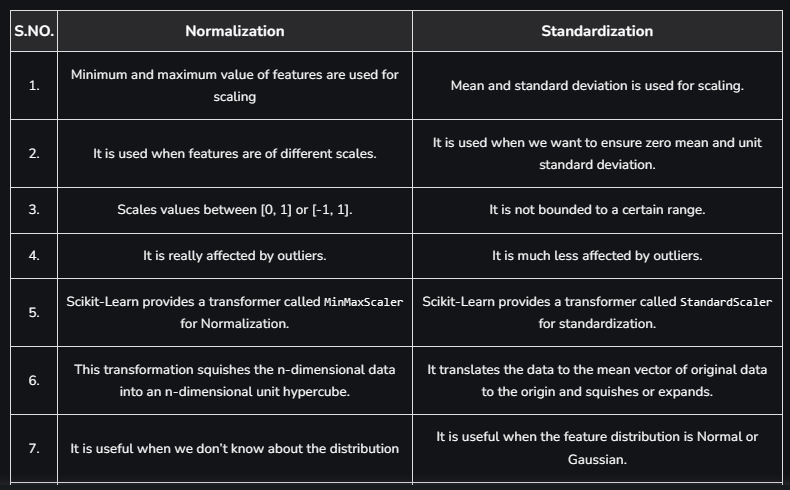

Z-score is a measurement of how many standard deviations a data point is from the mean of a distribution. A z-score of 0 indicates that the data point’s score is the same as the mean score. A positive z-score indicates that the data point is above average, while a negative z-score indicates that the data point is below average.

The formula for calculating a z-score is: z = (x – μ)/ σ

Can be applied to other distributions..

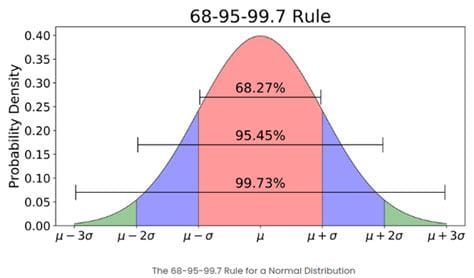

https://www.geeksforgeeks.org/z-score-in-statistics/#Application%20of%20Z-Score